# CMSE 202 Final Project #
Names: Garrit Hotchkiss, Ben Johnson, Isabel Petrescu, Jacob Marquez

The purpose of this project is to compare the spread of the influenza virus among the Michigan State University campus and several other college campuses. The college campuses we are analyzing are Michigan State University, University of Michigan, Ohio State University, California State University Fullerton (largest college campus), and Alaska Bible Study College (smallest college campus). We accomplish this goal using an agent-based model (ABM) to represent each location with the population density for the model dependent on the actual population and size of the location.
# Define necessary functions #
Here we import our necessary libraries and define the functions that will be needed to create our ABM model to demonstrate the spread of the influenza virus on each college campus.

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# animation and image imports
from IPython.display import display, clear_output
import time  
import imageio

In [2]:
def plotgrid(myarray):
    '''This function creates a grid that will be used to create each campus'''
    
    # creates a range of numbers to make the grid
    x_range = np.linspace(0, myarray.shape[0], myarray.shape[0]) 
    y_range = np.linspace(0, myarray.shape[0], myarray.shape[0])
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # susceptible/non-sick people = 1 
    susc_x = x_indices[myarray == 1];   
    susc_y = y_indices[myarray == 1];
    
    # sick people = 2
    infected_x = x_indices[myarray == 2];   
    infected_y = y_indices[myarray == 2];
    
    # immune/flu-shot people = 4
    immune_x = x_indices[myarray == 4]
    immune_y = y_indices[myarray == 4]
    
    # plots the x and y coordinates together and also assigns them a color and size
    plt.plot(susc_x, susc_y, 'gs',markersize = 10)   
    plt.plot(infected_x, infected_y, 'rs',markersize = 10)
    plt.plot(immune_x, immune_y, 'bs', markersize = 10)
    
    # set xlim and ylim to improve how the grid looks
    plt.xlim([-1,myarray.shape[0]+1])
    plt.ylim([-1,myarray.shape[0]+1]) 

    # removing ticks and labels
    plt.tick_params(axis='both', which='both',bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')

In [3]:
def set_board(board_size, immune, infected, pop):
    '''This function creates the initial board before the infection spreads'''
    
    # all cells initialized to 'empty' by default which equals 0 
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    # loops through every position of the board and will randomly change the 'empty' (0)
    # to infected, susceptible, or immune
    for i in range(board_size):
        
        for j in range(board_size):
            
            if np.random.random() <= pop:
                
                game_board[i,j] = 1
            
            elif np.random.random() <= immune:
                
                game_board[i,j] = 4
                
            elif np.random.random() <= infected:
                
                game_board[i, j] = 2
    
    return game_board

In [4]:
def onBoard(i, j, board):
    '''This function is given a board, as a 2D array, and the index, of the format (i,j), of a point 
    and checks whether or not the point is on the board'''
    
    # check if the point at index (i,j) actually exists on the board
    if i <= board.shape[0]-1 and i >= 0 and j <= board.shape[1]-1 and j >= 0:
        
        return True
    
    # check if the point is not on the board
    else:
        
        return False

In [5]:
def getNeighborValues(i, j, board):
    '''This function makes use of the onBoard function to find the neighbors (left, right, above, below, diagonal) 
    of a point on the given board once the point is confirmed to be on the board. The position of each neighbor 
    is also confirmed to be on the board before being considered a 'valid' neighbor'''
    
    # The following list contains the indices of the neighbors for a point at index (i,j)
    # and uses the Moore Model, meaning that the neighbors at diagonal points are included
    neighborhood = [(i-1,j-1), (i-1, j), (i-1,j+1), (i, j-1), (i, j+1), (i+1,j-1), (i+1,j), (i+1,j+1)]
    
    # initialize an empty list of valid neighbors
    neighbor_values = []
    
    # for each neighbor in the list verify that the index of the neighbor exists on the board
    # if the neighbor exists on the board the index is included in a list of valid neighbors
    for neighbor in neighborhood:
        if onBoard(neighbor[0],neighbor[1],board):
            neighbor_values.append(board[neighbor[0],neighbor[1]]) 
    
    return neighbor_values

In [6]:
def advance_board(game_board, infect):
    '''This function runs an ABM model and performs dynamic infecting of the initial board'''
    
    # create a new array that's a copy of the original (same shape) 
    # copy array is initialized to all zeros
    new_board = np.zeros_like(game_board)
   
    # loop through each position and update board
    for i in range(game_board.shape[0]):
        for j in range(game_board.shape[1]):
            
            # update new_board if location is empty
            if game_board[i,j] == 0:
                new_board[i,j] = 0
                
            # update new_board if location is immune
            if game_board[i,j] == 4:
                new_board[i,j] = 4
            
            # update new_board if location is infected
            if game_board[i,j] == 2:
                new_board[i,j] = 2
    
            # if location is susceptible, check to see if they get infected
            if game_board[i,j] == 1:
                
                # initially make the position susceptible on new_board
                new_board[i,j] = 1
                
                # If one of the neighboring cells was infected last turn
                # infect represents the virus infection rate
                neighbors = getNeighborValues(i,j, game_board)
                for n in neighbors:
                    if n == 2:
                         if np.random.random() < infect:
                            new_board[i,j] = 2
    
    # return the new board
    return new_board

# California State University Fullerton #
Here the ABM model is performed for the California State University Fullerton campus with a population density of 0.1825.

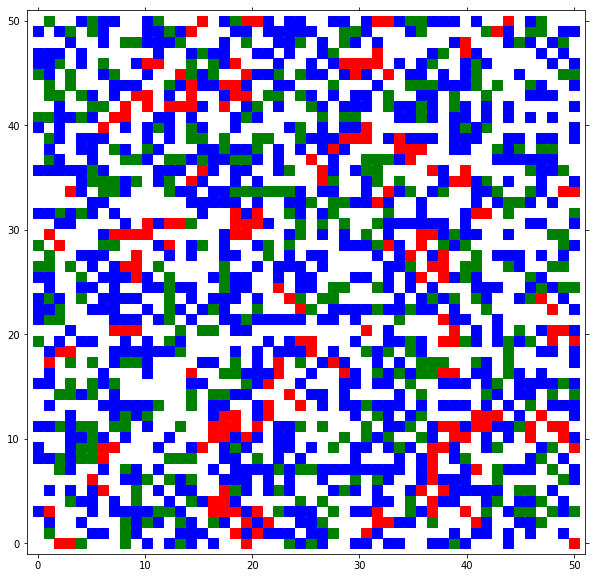

In [7]:
# creates 50 by 50 board
board_size = 50

# figure size that looks best
fig = plt.figure(figsize=(10,10))

# inputs for influenza virus infection rate
# immunity is 37.1% across US (from Centers for Disease Control (CDC) data)
# The number of starting infected people is arbitrary, we have decided on 5% of the initial population
# population density depends on college campus 
    # calculated as (25 sq ft per student * # of students)/area of campus in sq ft
game_board = set_board(board_size = board_size, immune = 0.371, infected = 0.05, pop = 0.1825)

# plot initial board
plotgrid(game_board)

# indicator variable if position/person is infected or not
infected = True
iterations = 0
imagename = []

# while there is at least one infected position
while infected == True:
    iterations += 1
    game_board = advance_board(game_board, infect = 0.024)
    
    # plot our advanced board (with some animation commands)
    plotgrid(game_board)
    time.sleep(0.00000000001)  # 
    
    # save the figures as .png files so we can later save them in .gif format
    fig.savefig("images/cal"+str(iterations)+".png")
    imagename.append("images/cal"+str(iterations)+".png")
    
    clear_output(wait = True)
    display(fig)
    fig.clear()
    
    # running for set number of iterations
    if iterations > 50:
        infected = False
   
    if (game_board == 2).sum() == 0.0:
        infected = False

# close the figure
plt.close()     

In [8]:
# iterating through board to get counts
empty_count = 0
immune_count = 0
susc_count = 0 
infected_count = 0

for i in range(game_board.shape[0]):
    for j in range(game_board.shape[1]):
        
        if game_board[i,j] == 0:
            empty_count += 1
                
        if game_board[i,j] == 4:
            immune_count += 1
            
        if game_board[i,j] == 2:
            infected_count += 1
    
        if game_board[i,j] == 1:
            susc_count += 1 
            
                            
counts = [empty_count, immune_count, susc_count, infected_count]

In [9]:
# print counts for total population and each condition (empty, immune, healthy/susceptible, infected)
print("Total Population:", counts[1] + counts[2] + counts[3])
print("# of empty cells:",counts[0])
print("# of Immune People:",counts[1])
print("# of Healthy People:",counts[2])
print("# of Sick People:",counts[3])

Total Population: 1330
# of empty cells: 1170
# of Immune People: 774
# of Healthy People: 362
# of Sick People: 194


In [10]:
# create a gif of the ABM model of the board
images = []

for img in imagename:
    images.append(imageio.imread(img))
imageio.mimsave('gifs/cal_movie.gif', images)

# Michigan State University #
Here the ABM model is performed for the Michigan State University campus with a population density of 0.005565.

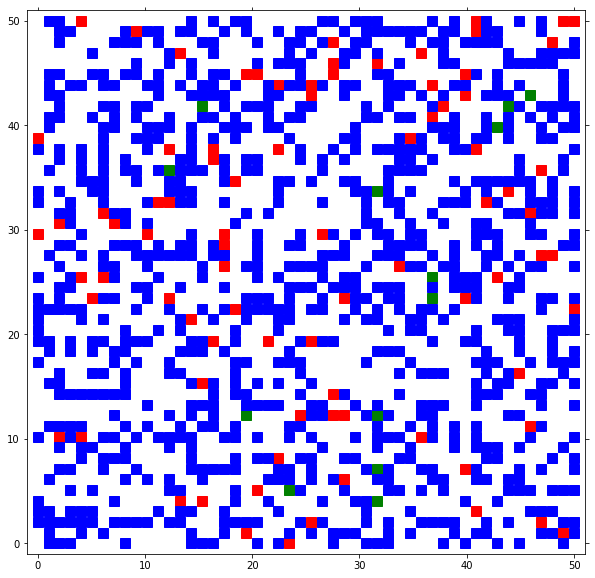

In [11]:
# creates 50 by 50 board
board_size = 50

# figure size that looks best
fig = plt.figure(figsize=(10,10))

# inputs for influenza virus infection rate
# immunity is 37.1% across US (from Centers for Disease Control (CDC) data)
# The number of starting infected people is arbitrary, we have decided on 5% of the initial population
# population density depends on college campus 
    # calculated as (25 sq ft per student * # of students)/area of campus in sq ft
game_board = set_board(board_size = board_size, immune = 0.371, infected = 0.05, pop = 0.005565)

# plot initial board
plotgrid(game_board)

# indicator variable if position/person is infected or not
infected = True
iterations = 0
imagename = []

# while there is at least one infected position
while infected == True:
    iterations += 1
    game_board = advance_board(game_board, infect = 0.024)
    
    # plot our advanced board (with some animation commands)
    plotgrid(game_board)
    time.sleep(0.00000000001)  # 
    
    # save the figures as .png files so we can later save them in .gif format
    fig.savefig("images/msu"+str(iterations)+".png")
    imagename.append("images/msu"+str(iterations)+".png")
    
    clear_output(wait = True)
    display(fig)
    fig.clear()
    
    # running for set number of iterations
    if iterations > 50:
        infected = False
   
    if (game_board == 2).sum() == 0.0:
        infected = False

# close the figure
plt.close()     

In [12]:
# iterating through board to get counts
empty_count = 0
immune_count = 0
susc_count = 0 
infected_count = 0

for i in range(game_board.shape[0]):
    for j in range(game_board.shape[1]):
        
        if game_board[i,j] == 0:
            empty_count += 1
                
        if game_board[i,j] == 4:
            immune_count += 1
            
        if game_board[i,j] == 2:
            infected_count += 1
    
        if game_board[i,j] == 1:
            susc_count += 1 
            
                            
counts = [empty_count, immune_count, susc_count, infected_count]

In [13]:
# print counts for total population and each condition (empty, immune, healthy/susceptible, infected)
print("Total Population:", counts[1] + counts[2] + counts[3])
print("# of empty cells:",counts[0])
print("# of Immune People:",counts[1])
print("# of Healthy People:",counts[2])
print("# of Sick People:",counts[3])

Total Population: 1005
# of empty cells: 1495
# of Immune People: 908
# of Healthy People: 13
# of Sick People: 84


In [14]:
# create a gif of the ABM model of the board
images = []

for img in imagename:
    images.append(imageio.imread(img))
imageio.mimsave('gifs/msu_movie.gif', images)

# University of Michigan #
Here the ABM model is performed for the University of Michigan campus with a population density of 0.00800274.

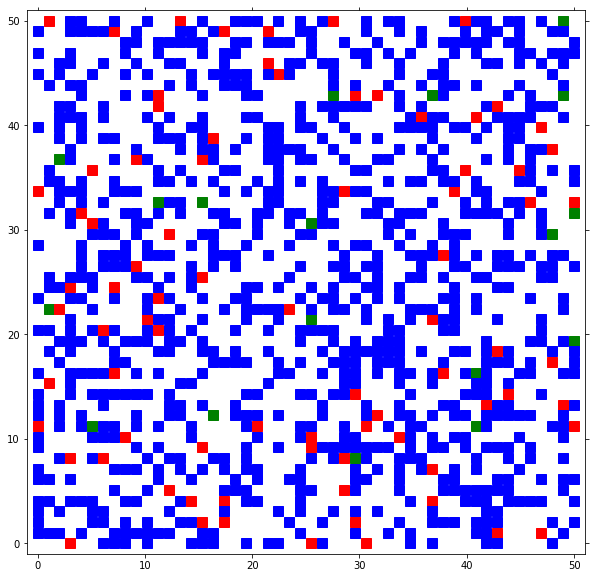

In [15]:
# creates 50 by 50 board
board_size = 50

# figure size that looks best
fig = plt.figure(figsize=(10,10))

# inputs for influenza virus infection rate
# immunity is 37.1% across US (from Centers for Disease Control (CDC) data)
# The number of starting infected people is arbitrary, we have decided on 5% of the initial population
# population density depends on college campus 
    # calculated as (25 sq ft per student * # of students)/area of campus in sq ft
game_board = set_board(board_size = board_size, immune = 0.371, infected = 0.05, pop = 0.00800274)

# plot initial board
plotgrid(game_board)

# indicator variable if position/person is infected or not
infected = True
iterations = 0
imagename = []

# while there is at least one infected position
while infected == True:
    iterations += 1
    game_board = advance_board(game_board, infect = 0.024)
    
    # plot our advanced board (with some animation commands)
    plotgrid(game_board)
    time.sleep(0.00000000001)  # 
    
    # save the figures as .png files so we can later save them in .gif format
    fig.savefig("images/umich"+str(iterations)+".png")
    imagename.append("images/umich"+str(iterations)+".png")
    
    clear_output(wait = True)
    display(fig)
    fig.clear()
    
    # running for set number of iterations
    if iterations > 50:
        infected = False
   
    if (game_board == 2).sum() == 0.0:
        infected = False

# close the figure
plt.close()     

In [16]:
# iterating through board to get counts
empty_count = 0
immune_count = 0
susc_count = 0 
infected_count = 0

for i in range(game_board.shape[0]):
    for j in range(game_board.shape[1]):
        
        if game_board[i,j] == 0:
            empty_count += 1
                
        if game_board[i,j] == 4:
            immune_count += 1
            
        if game_board[i,j] == 2:
            infected_count += 1
    
        if game_board[i,j] == 1:
            susc_count += 1 
            
                            
counts = [empty_count, immune_count, susc_count, infected_count]

In [17]:
# print counts for total population and each condition (empty, immune, healthy/susceptible, infected)
print("Total Population:", counts[1] + counts[2] + counts[3])
print("# of empty cells:",counts[0])
print("# of Immune People:",counts[1])
print("# of Healthy People:",counts[2])
print("# of Sick People:",counts[3])

Total Population: 1000
# of empty cells: 1500
# of Immune People: 902
# of Healthy People: 18
# of Sick People: 80


In [18]:
# create a gif of the ABM model of the board
images = []

for img in imagename:
    images.append(imageio.imread(img))
imageio.mimsave('gifs/umich_movie.gif', images)

# Ohio State University #
Here the ABM model is performed for the Ohio State University campus with a population density of 0.02290274.

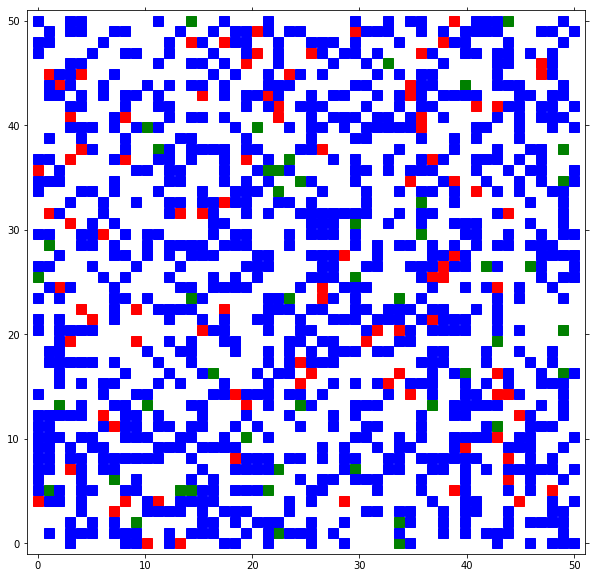

In [19]:
# creates 50 by 50 board
board_size = 50

# figure size that looks best
fig = plt.figure(figsize=(10,10))

# inputs for influenza virus infection rate
# immunity is 37.1% across US (from Centers for Disease Control (CDC) data)
# The number of starting infected people is arbitrary, we have decided on 5% of the initial population
# population density depends on college campus 
    # calculated as (25 sq ft per student * # of students)/area of campus in sq ft
game_board = set_board(board_size = board_size, immune = 0.371, infected = 0.05, pop = 0.02290274)

# plot initial board
plotgrid(game_board)

# indicator variable if position/person is infected or not
infected = True
iterations = 0
imagename = []

# while there is at least one infected position
while infected == True:
    iterations += 1
    game_board = advance_board(game_board, infect = 0.024)
    
    # plot our advanced board (with some animation commands)
    plotgrid(game_board)
    time.sleep(0.00000000001)  # 
    
    # save the figures as .png files so we can later save them in .gif format
    fig.savefig("images/ohio"+str(iterations)+".png")
    imagename.append("images/ohio"+str(iterations)+".png")
    
    clear_output(wait = True)
    display(fig)
    fig.clear()
    
    # running for set number of iterations
    if iterations > 50:
        infected = False
   
    if (game_board == 2).sum() == 0.0:
        infected = False

# close the figure
plt.close()     

In [20]:
# iterating through board to get counts
empty_count = 0
immune_count = 0
susc_count = 0 
infected_count = 0

for i in range(game_board.shape[0]):
    for j in range(game_board.shape[1]):
        
        if game_board[i,j] == 0:
            empty_count += 1
                
        if game_board[i,j] == 4:
            immune_count += 1
            
        if game_board[i,j] == 2:
            infected_count += 1
    
        if game_board[i,j] == 1:
            susc_count += 1 
            
                            
counts = [empty_count, immune_count, susc_count, infected_count]

In [21]:
# print counts for total population and each condition (empty, immune, healthy/susceptible, infected)
print("Total Population:", counts[1] + counts[2] + counts[3])
print("# of empty cells:",counts[0])
print("# of Immune People:",counts[1])
print("# of Healthy People:",counts[2])
print("# of Sick People:",counts[3])

Total Population: 1059
# of empty cells: 1441
# of Immune People: 917
# of Healthy People: 47
# of Sick People: 95


In [22]:
# create a gif of the ABM model of the board
images = []

for img in imagename:
    images.append(imageio.imread(img))
imageio.mimsave('gifs/ohio_movie.gif', images)

# Alaska Bible Study College #
Here the ABM model is performed for the Alaska Bible Study College campus with a population density of 0.04683196.

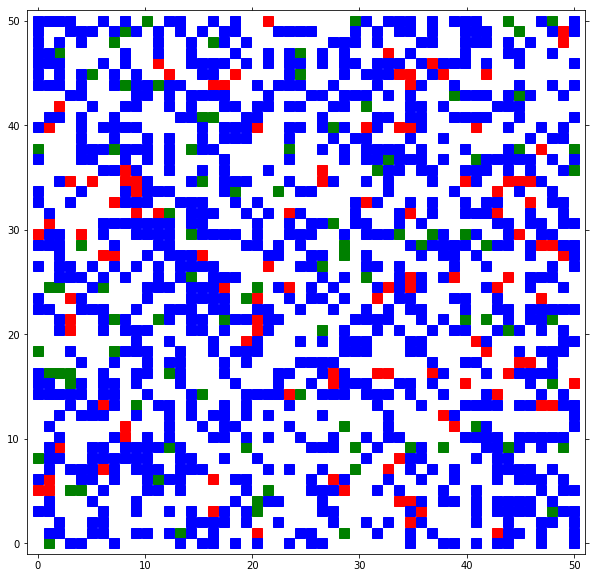

In [23]:
# creates 50 by 50 board
board_size = 50

# figure size that looks best
fig = plt.figure(figsize=(10,10))

# inputs for influenza virus infection rate
# immunity is 37.1% across US (from Centers for Disease Control (CDC) data)
# The number of starting infected people is arbitrary, we have decided on 5% of the initial population
# population density depends on college campus 
    # calculated as (25 sq ft per student * # of students)/area of campus in sq ft
game_board = set_board(board_size = board_size, immune = 0.371, infected = 0.05, pop = 0.04683196)

# plot initial board
plotgrid(game_board)

# indicator variable if position/person is infected or not
infected = True
iterations = 0
imagename = []

# while there is at least one infected position
while infected == True:
    iterations += 1
    game_board = advance_board(game_board, infect = 0.024)
    
    # plot our advanced board (with some animation commands)
    plotgrid(game_board)
    time.sleep(0.00000000001)  # 
    
    # save the figures as .png files so we can later save them in .gif format
    fig.savefig("images/alaska"+str(iterations)+".png")
    imagename.append("images/alaska"+str(iterations)+".png")
    
    clear_output(wait = True)
    display(fig)
    fig.clear()
    
    # running for set number of iterations
    if iterations > 50:
        infected = False
   
    if (game_board == 2).sum() == 0.0:
        infected = False

# close the figure
plt.close()     

In [24]:
# iterating through board to get counts
empty_count = 0
immune_count = 0
susc_count = 0 
infected_count = 0

for i in range(game_board.shape[0]):
    for j in range(game_board.shape[1]):
        
        if game_board[i,j] == 0:
            empty_count += 1
                
        if game_board[i,j] == 4:
            immune_count += 1
            
        if game_board[i,j] == 2:
            infected_count += 1
    
        if game_board[i,j] == 1:
            susc_count += 1 
            
                            
counts = [empty_count, immune_count, susc_count, infected_count]

In [25]:
# print counts for total population and each condition (empty, immune, healthy/susceptible, infected)
print("Total Population:", counts[1] + counts[2] + counts[3])
print("# of empty cells:",counts[0])
print("# of Immune People:",counts[1])
print("# of Healthy People:",counts[2])
print("# of Sick People:",counts[3])

Total Population: 1120
# of empty cells: 1380
# of Immune People: 918
# of Healthy People: 92
# of Sick People: 110


In [26]:
# create a gif of the ABM model of the board
images = []

for img in imagename:
    images.append(imageio.imread(img))
imageio.mimsave('gifs/alaska_movie.gif', images)